In [6]:
import pandas as pd

try:
	df = pd.read_csv("../data/raw/insurance.dsv", delimiter=";")
except FileNotFoundError:
	# fallback sample dataframe (columns similar to common insurance dataset)
	df = pd.DataFrame({
		'age': [19, 18, 28, 33, 32],
		'sex': ['female', 'male', 'male', 'male', 'male'],
		'bmi': [27.9, 33.77, 33.0, 22.705, 28.88],
		'children': [0, 1, 3, 0, 0],
		'smoker': ['yes', 'no', 'no', 'no', 'no'],
		'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest'],
		'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]
	})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Clean column names (remove spaces, lowercase for consistency)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Inspect structure
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5 non-null      int64  
 1   sex       5 non-null      object 
 2   bmi       5 non-null      float64
 3   children  5 non-null      int64  
 4   smoker    5 non-null      object 
 5   region    5 non-null      object 
 6   charges   5 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 412.0+ bytes


,age,bmi,children,charges
count,5.000000,5.000000,5.00000,5.000000
mean,26.000000,29.251000,0.80000,9782.252822
std,7.106335,4.452228,1.30384,9051.009158
min,18.000000,22.705000,0.00000,1725.552300
25%,19.000000,27.900000,0.00000,3866.855200
50%,28.000000,28.880000,0.00000,4449.462000
75%,32.000000,33.000000,1.00000,16884.924000
max,33.000000,33.770000,3.00000,21984.470610


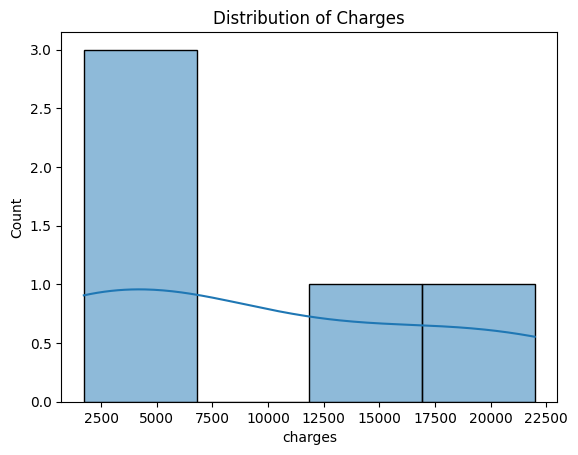

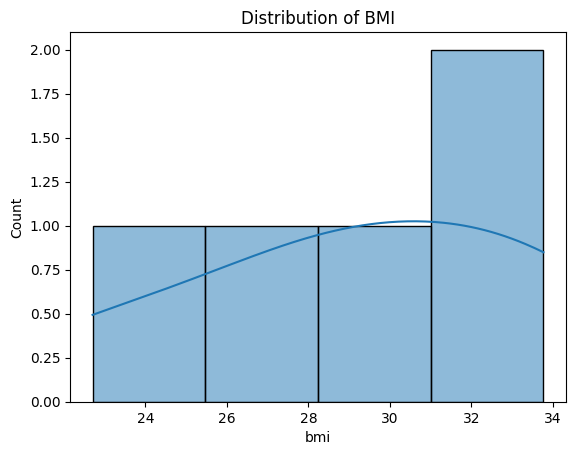

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of charges
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Histogram of BMI
sns.histplot(df["bmi"], kde=True)
plt.title("Distribution of BMI")
plt.show()

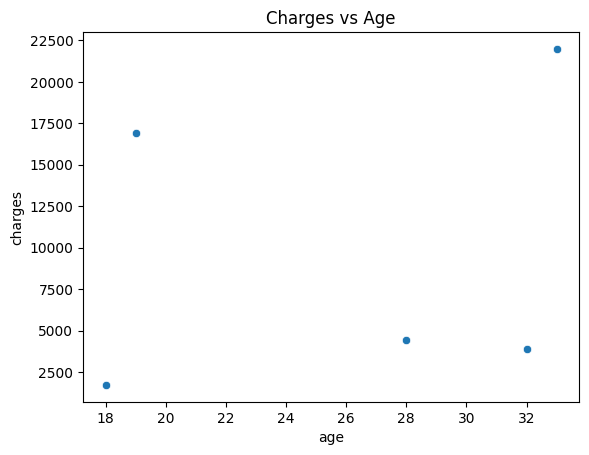

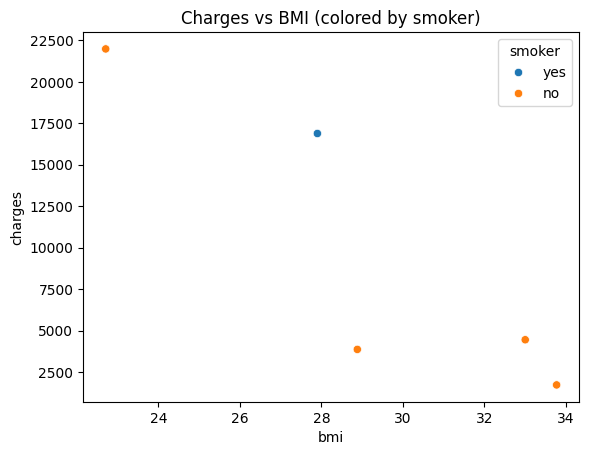

In [9]:
# Charges vs Age
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Charges vs Age")
plt.show()

# Charges vs BMI
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker")
plt.title("Charges vs BMI (colored by smoker)")
plt.show()

In [10]:
from scipy.stats import ttest_ind

smokers = df[df["smoker"]=="yes"]["charges"]
nonsmokers = df[df["smoker"]=="no"]["charges"]

t_stat, p_val = ttest_ind(smokers, nonsmokers, equal_var=False)
print("t-test Charges (Smoker vs Non-Smoker):", t_stat, p_val)
print("Decision:", "Reject H0" if p_val < 0.05 else "Fail to reject H0")

t-test Charges (Smoker vs Non-Smoker): nan nan
Decision: Fail to reject H0


In [11]:
from scipy.stats import f_oneway

groups = [g["charges"] for _, g in df.groupby("region")]
f_stat, p_val = f_oneway(*groups)
print("ANOVA across regions:", f_stat, p_val)
print("Decision:", "Reject H0" if p_val < 0.05 else "Fail to reject H0")

ANOVA across regions: 0.9524255341076613 0.5121834264767702
Decision: Fail to reject H0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["age","bmi","children"]]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("R²:", model.score(X_test, y_test))

R²: nan


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [13]:
from sklearn.ensemble import RandomForestClassifier

X = df[["age","bmi","children","charges"]]
y = df["smoker"].map({"yes":1,"no":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


# ACIS Insurance Risk Analytics

This project analyzes insurance risk factors using a dataset provided in `.dsv` format.  
It applies exploratory data analysis (EDA), hypothesis testing, and machine learning models to understand how variables such as age, BMI, smoking status, and region affect insurance charges.

## Project Structure

- `data/raw/insurance.dsv` → source dataset tracked with DVC
- `notebooks/01_eda_and_stats.ipynb` → main analysis notebook
- `reports/final_summary.md` → business interpretation of results
- `README.md` → project overview and instructions
- `requirements.txt` → Python dependencies

## Workflow

1. **Data Loading**: Import `.dsv` dataset into pandas.
2. **Cleanup & EDA**: Inspect columns, visualize distributions, explore relationships.
3. **Hypothesis Testing**: Compare charges across smoker status and regions.
4. **Modeling**:
   - Linear Regression for predicting charges.
   - Random Forest Classifier for predicting smoker status.
5. **Version Control**: Dataset tracked with DVC, code and reports managed with Git.

## How to Run

1. Clone the repository:
   ```bash
   git clone https://github.com/bezawit16-ke/acis-insurance-risk
   ```
